In [1]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [2]:
def apply_filter(np_image, np_kernel):
    np_image_height, np_image_width = np_image.shape
    kernel_height, kernel_width = np_kernel.shape

    pad_x = kernel_width // 2
    pad_y = kernel_height // 2

    np_padded_image = np.pad(np_image, ((pad_y, pad_y), (pad_x, pad_x)), mode='reflect')
    output= np.zeros_like(np_padded_image, dtype=np.float32)

    for y in range(np_image_height):
        for x in range(np_image_width):
            region = np_padded_image[y:y+kernel_height, x:x+kernel_width]
            output[y, x] = np.sum(region * np_kernel)

    output = output[:np_image_height, :np_image_width]
    return output

In [3]:
def calc_gradient_angle_and_magnitude(filtered_image_x, filtered_image_y):
    gradient_magnitude = np.sqrt(filtered_image_x**2 + filtered_image_y**2)
    gradient_angle = np.arctan2(filtered_image_y, filtered_image_x)
    return gradient_angle, gradient_magnitude

In [4]:
def display_gradient(gradient_angle, gradient_magnitude):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5), dpi=100)
    ax[0].imshow(gradient_angle, cmap='hsv')
    ax[0].set_title("Gradient angle")
    ax[1].imshow(gradient_magnitude, cmap='gray')
    ax[1].set_title("Gradient magnitude")
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0.2)
    plt.savefig('gradient.png',bbox_inches='tight', pad_inches=0.1)
    plt.show()

In [5]:
def display_filtered_images(filtered_image_x, filtered_image_y):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5), dpi=100)
    ax[0].imshow(filtered_image_x, cmap='gray')
    ax[0].set_title("Filtered image X")
    ax[1].imshow(filtered_image_y, cmap='gray')
    ax[1].set_title("Filtered image Y")
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0.2)
    plt.savefig('filtered_images.png',bbox_inches='tight', pad_inches=0.1)
    plt.show()

In [6]:
def draw_point_angles_on_image(image, point_list):
    fig, ax = plt.subplots(figsize=(image.shape[1] / 100, image.shape[0] / 100), dpi=100)
    ax.imshow(image, cmap='gray')
    ax.set_title("Image with Points and Angles")
    for idx, (point, angle) in enumerate(point_list, start=1):
        x, y = point
        angle_degrees = np.degrees(angle)
        circle = plt.Circle((x, y), radius=5, color='red', fill=True, linewidth=2)
        ax.add_patch(circle)
        
        ax.text(
            x + 7, y, 
            f"point {idx} ({x}, {y})\nangle: {angle_degrees:.2f}°", 
            color='red', fontsize=10, ha='left', va='center'
        )
    
    # save the image
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0.2)
    plt.savefig('image_with_points_and_angles.png',bbox_inches='tight', pad_inches=0.1)
    plt.show()

Image size:  (512, 512)
Image mode:  L
np_image dtype:  float32


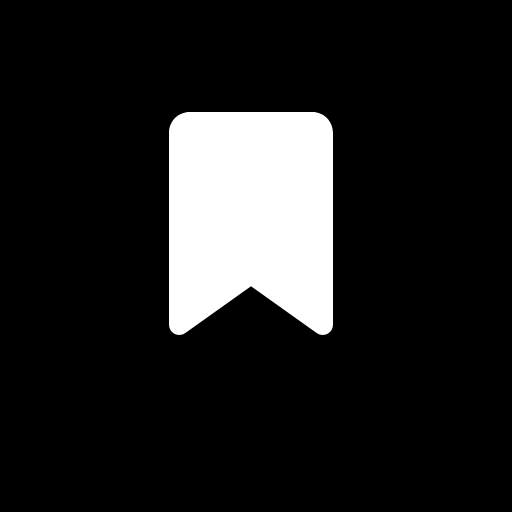

In [7]:
input_image = Image.open("images/save.png")
input_image = input_image.convert("L")
np_input_image = np.array(input_image, dtype=np.float32)

print("Image size: ", input_image.size)
print("Image mode: ", input_image.mode)
print("np_image dtype: ", np_input_image.dtype)
display(input_image)

In [8]:
filter_x = np.array([[-1., 0., 1.]])
filter_y = np.array([[-1.], [0.], [1.]])

print("Filter X: ", filter_x)
print("Filter X shape: ", filter_x.shape)
print("Filter Y: ", filter_y)
print("Filter Y shape: ", filter_y.shape)

Filter X:  [[-1.  0.  1.]]
Filter X shape:  (1, 3)
Filter Y:  [[-1.]
 [ 0.]
 [ 1.]]
Filter Y shape:  (3, 1)


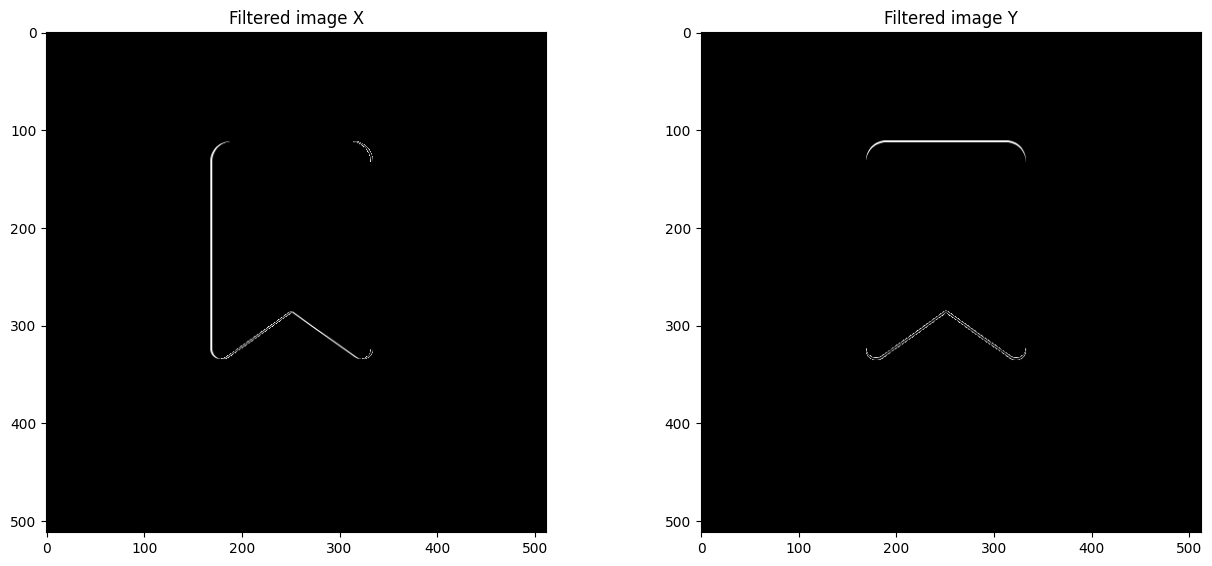

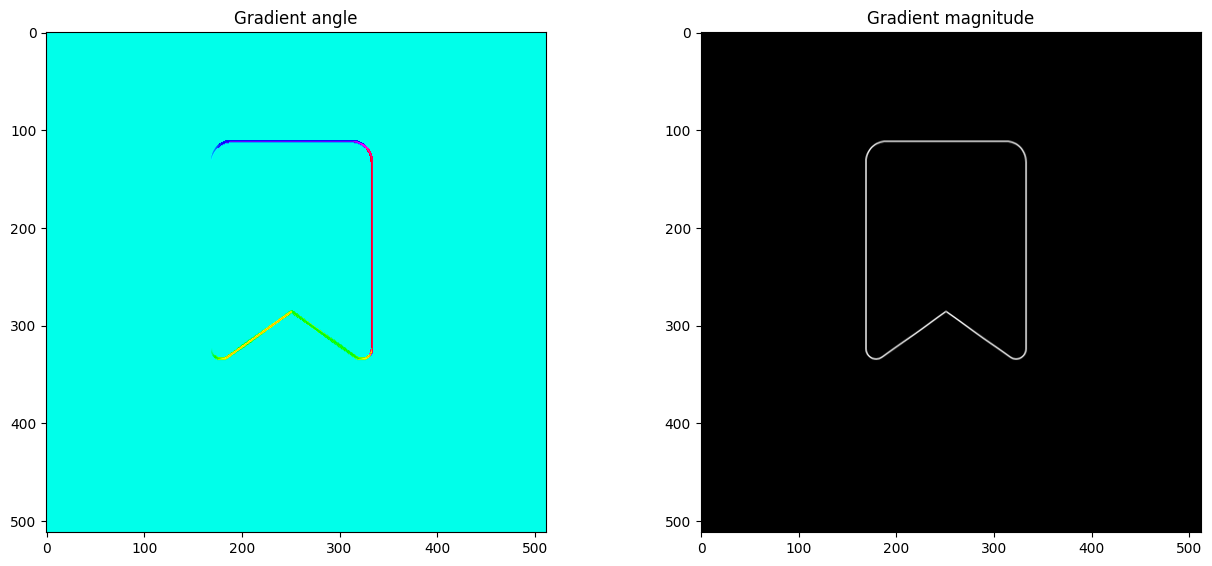

In [9]:
filtered_image_x = apply_filter(np_input_image, filter_x)
filtered_image_y = apply_filter(np_input_image, filter_y)

display_filtered_images(filtered_image_x.astype(np.uint8), filtered_image_y.astype(np.uint8))

gradient_angle, gradient_magnitude = calc_gradient_angle_and_magnitude(filtered_image_x, filtered_image_y)

display_gradient(gradient_angle, gradient_magnitude)


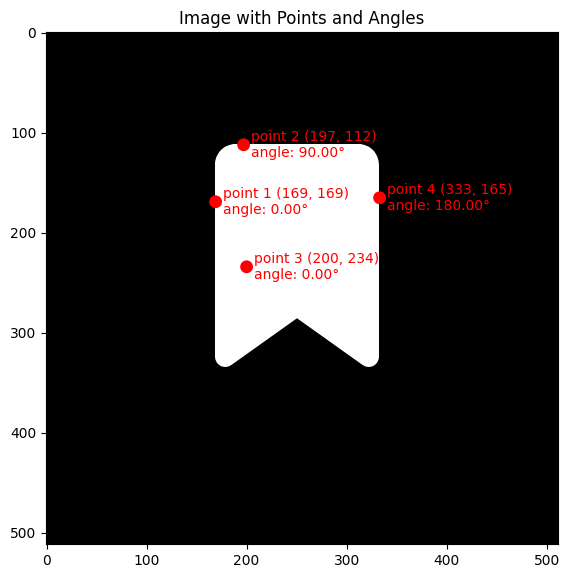

In [10]:
points = [np.array([169, 169]), np.array([197, 112]), np.array([200, 234]), np.array([333,165])]
point_angles = [(point, gradient_angle[point[1], point[0]]) for point in points]

image_with_angles = draw_point_angles_on_image(np_input_image, point_angles)